In [1]:
import pandas as pd
import altair as alt

potential_snl = pd.read_csv("/Users/estene/Documents/GitHub/snl_coefficient/data/full_data_snl_movies_coefficient.csv")
definitive_snl = potential_snl[potential_snl['movie_coefficient']>1]

In [2]:
potential_snl.shape

(4228, 15)

In [3]:
with open("/Users/estene/Documents/GitHub/snl_coefficient/data/snl_associated_media.txt", "r") as tf:
    snl_media = tf.read().split('\n')
definitive_snl = definitive_snl[~definitive_snl['imdb_link'].isin(snl_media)] # this removes the "SNL-associated" media
definitive_snl.shape

(176, 15)

In [4]:
def tidy_split(df, column, sep='|', keep=False):
    """
    Params
    ------
    df : pandas.DataFrame
        dataframe with the column to split and expand
    column : str
        the column to split and expand
    sep : str
        the string used to split the column's values
    keep : bool
        whether to retain the presplit value as it's own row

    Returns
    -------
    pandas.DataFrame
        Returns a dataframe with the same columns as `df`.
    """
    indexes = list()
    new_values = list()
    df = df.dropna(subset=[column])
    for i, presplit in enumerate(df[column].astype(str)):
        values = presplit.split(sep)
        if keep and len(values) > 1:
            indexes.append(i)
            new_values.append(presplit)
        for value in values:
            indexes.append(i)
            new_values.append(value)
    new_df = df.iloc[indexes, :].copy()
    new_df[column] = new_values
    return new_df

In [5]:
# Bar Chart of Definitive SNL Media Genres (that aren't directly associated with SNL)
genres_count = definitive_snl.copy()
genres_count['genres'] = genres_count['genres'].apply(eval)
for idx, row in genres_count.iterrows():
    genres_count.at[idx, 'genres'] = "|".join(map(str,row.genres))

genres_count.head()
genres_count.to_csv("genres.csv", index=False)
genres_unique = tidy_split(genres_count, "genres", sep='|', keep=False)
genres_unique =  genres_unique.groupby(['genres']).size().reset_index(name="count")
genres_unique.sort_values(by='count', ascending=False, inplace=True)
genres_unique

bars = alt.Chart(genres_unique).mark_bar().encode(x='count',y=alt.Y('genres',sort='-x'))
text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='count:Q'
)

(bars + text).properties(height=900)

alt.LayerChart(...)

In [6]:
# Bar Chart of Definitive SNL Media Types (that aren't directly associated with SNL)
media_count = definitive_snl.copy()
media_count['medium'] = media_count['medium'].apply(eval)
for idx, row in media_count.iterrows():
    media_count.at[idx, 'medium'] = "|".join(map(str,row.medium))

media_count.head()
media_unique = tidy_split(media_count, "medium", sep='|', keep=False)
media_unique = media_unique.groupby(['medium']).size().reset_index(name="count")
media_unique.sort_values(by='count', ascending=False, inplace=True)
media_unique

bars = alt.Chart(media_unique).mark_bar().encode(x='count',y=alt.Y('medium',sort='-x'))
text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='count:Q'
)

(bars + text).properties(height=900)

alt.LayerChart(...)

In [7]:
# Bar Chart of Alums Involved in SNL Media (that aren't directly associated with SNL)
alums_count = definitive_snl.copy()
alums_count['snl_alums'] = alums_count['snl_alums'].apply(eval)
for idx, row in alums_count.iterrows():
    alums_count.at[idx, 'snl_alums'] = "|".join(map(str,row.snl_alums))
#alums_count.head()
alums_unique = tidy_split(alums_count, "snl_alums", sep='|', keep=False)
#alums_unique.head()
alums_unique = alums_unique.groupby(['snl_alums']).size().reset_index(name="count")
alums_unique.sort_values(by='count', ascending=False, inplace=True)
alums_unique = alums_unique[alums_unique['count']>20]
alums_unique

bars = alt.Chart(alums_unique).mark_bar().encode(x='count',y=alt.Y('snl_alums',sort='-x'))
text = bars.mark_text(
    align='left',
   baseline='middle',
    dx=3  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text='count:Q'
)

(bars + text).properties(height=900)

alt.LayerChart(...)

In [8]:
# Bar Chart of Definitive SNL Films (that aren't directly associated with SNL) by Decade
films_by_decade = definitive_snl.copy()
films_by_decade['medium'] = films_by_decade['medium'].apply(eval)
for idx, row in films_by_decade.iterrows():
    films_by_decade.at[idx, 'medium'] = "|".join(map(str,row.medium))
    
films_by_decade = films_by_decade[films_by_decade['medium']=='Film']
films_by_decade['year_start'] = films_by_decade['year_start'].astype('string')
for idx, row in films_by_decade.iterrows():
    films_by_decade.at[idx, 'decade'] = row.year_start[:3] + '0s'
films_by_decade.head()

films_by_decade_unique = films_by_decade.groupby(['decade']).size().reset_index(name="count")

bars = alt.Chart(films_by_decade_unique).mark_bar().encode(x='decade',y='count')
text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=0  # Nudges text to right so it doesn't appear on top of the bar - need to fix for this one. also tooltip?
).encode(
    text='count:Q'
)

(bars + text).properties(height=900)

alt.LayerChart(...)

In [9]:
# Bar Chart of Definitive SNL Media (that aren't directly associated with SNL) by Decade & Genre
media_by_decade = definitive_snl.copy()
media_by_decade['year_start'] = media_by_decade['year_start'].astype('string')
media_by_decade = media_by_decade.dropna(subset=['year_start'])
for idx, row in media_by_decade.iterrows():
    media_by_decade.at[idx, 'decade'] = row.year_start[:3] + '0s'
media_by_decade.head()

media_by_decade['medium'] = media_by_decade['medium'].apply(eval)
for idx, row in media_by_decade.iterrows():
    media_by_decade.at[idx, 'medium'] = "|".join(map(str,row.medium))

media_by_decade.head()

media_by_decade_unique = media_by_decade.groupby(['decade','medium']).size().reset_index(name="count")


# Create a stacked bar chart
alt.Chart(media_by_decade_unique).mark_bar(size=4).encode(
    
    # Year on the X axis
    x=alt.X('decade:N', axis=alt.Axis(format='c', title='Decade')),
    
    # Number of objects on the Y axis
    y=alt.Y('count:Q', title='Number of objects'),
    
    # Color according to the type
    color='medium:N',
    
    # Details on hover
    tooltip=[alt.Tooltip('medium:N', title='Medium'), alt.Tooltip('decade:N', title='Decade'), alt.Tooltip('count:Q', title='Count', format=',')]
).properties(width=700)


#media_by_decade_unique

alt.Chart(...)

In [10]:
# build a dataset of potential SNL movies where Lorne is an snl_alum OR broadway video is involved AND the coefficient is below 1
not_definitive = potential_snl[potential_snl['movie_coefficient']<1]
lorne_factor = not_definitive[not_definitive['snl_alums'].str.contains("Lorne Michaels")]
lorne_factor.shape

(42, 15)

In [11]:
broadway_factor = not_definitive.dropna(subset=['production_companies'])
broadway_factor = broadway_factor[broadway_factor['production_companies'].str.contains("Broadway Video")]
broadway_factor.shape

(20, 15)

In [12]:
# What other actors do a MAJORITY of their eligible filmography above the SNL coefficient?
all_potential_snl = pd.read_csv("/Users/estene/Documents/GitHub/snl_coefficient/data/full_data_snl_movies_coefficient.csv")
list_pot_snl = all_potential_snl['imdb_link'].to_list()
all_definitive_snl = potential_snl[potential_snl['movie_coefficient']>1]

with open("/Users/estene/Documents/GitHub/snl_coefficient/data/snl_associated_media.txt", "r") as tf:
    snl_media = tf.read().split('\n')
we_call_snl_movies = all_definitive_snl[~all_definitive_snl['imdb_link'].isin(snl_media)]
list_we_call_snl = we_call_snl_movies['imdb_link'].to_list()
list_def_snl = all_definitive_snl['imdb_link'].to_list()
filmography_credits = pd.read_csv("/Users/estene/Documents/GitHub/snl_coefficient/data/performers_filmography_cleaned.csv")
with open("/Users/estene/Documents/GitHub/snl_coefficient/data/snl_alums.txt", "r") as tf:
    snl_alums = tf.read().split('\n')
del snl_alums[0]
columns = ['person', 'num_credits', 'potential_percent', 'def_percent','snl_percent']
filmography_percentage = pd.DataFrame(columns = columns)
for alum in snl_alums:
    all_credits = filmography_credits[filmography_credits['person']==alum].reset_index()
    all_credits = list(set(all_credits['imdb_link'].to_list()))
    num_credits = len(all_credits)
    they_are_df = [x for x in list_def_snl if x in all_credits]
    if len(they_are_df)!=0:
        def_percent = len(they_are_df)/len(all_credits)
    else:
        def_percent = 0
    they_are_pot = [x for x in list_pot_snl if x in all_credits]
    if len(they_are_pot)!=0:
        pot_percent = len(they_are_pot)/len(all_credits)
    else:
        pot_percent = 0
    they_are_we = [x for x in list_we_call_snl if x in all_credits]
    if len(they_are_we)!=0:
        snl_percent = len(they_are_we)/len(all_credits)
    else:
        snl_percent = 0
    values = [[alum, num_credits, pot_percent, def_percent, snl_percent]] 
    print(values)
    #filmography_percentage.iloc[count] = values
    filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
performers_coefficient = pd.read_csv("/Users/estene/Documents/GitHub/snl_coefficient/data/performers_with_coefficient.csv")
alums_snl_info = pd.merge(filmography_percentage, performers_coefficient, on='person', how='outer')
alums_snl_info.to_csv("/Users/estene/Documents/GitHub/snl_coefficient/data/perfomers_snl_credits_percentage.csv", index=False)
alums_snl_info
#For an actor's entire filmography (# of IMDB links in their filmography with coefficients above 1)/(# of IMDB links in their filmography)
#For an actor's potential SNL filmography (# of IMDB links in their filmography with coefficients above 1)/(# of IMDB links that could potentially be SNL films)

# What actors do a MAJORITY of their eligible filmography under the SNL coefficient?

[['Seth Meyers', 214, 0.8551401869158879, 0.3037383177570093, 0.13551401869158877]]
[['Colin Jost', 69, 0.927536231884058, 0.2608695652173913, 0.14492753623188406]]
[['Michael Che', 64, 0.9375, 0.1875, 0.09375]]
[['Tina Fey', 311, 0.887459807073955, 0.2958199356913183, 0.1607717041800643]]


/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/fo

[['Dennis Miller', 180, 0.7111111111111111, 0.14444444444444443, 0.022222222222222223]]
[['Jimmy Fallon', 365, 0.7452054794520548, 0.20821917808219179, 0.08493150684931507]]
[['Amy Poehler', 335, 0.8567164179104477, 0.24776119402985075, 0.1253731343283582]]
[['Jane Curtin', 163, 0.7177914110429447, 0.25153374233128833, 0.049079754601226995]]
[['Norm MacDonald', 156, 0.8012820512820513, 0.23076923076923078, 0.057692307692307696]]
[['Kevin Nealon', 312, 0.7596153846153846, 0.15705128205128205, 0.03205128205128205]]
[['Colin Quinn', 156, 0.7756410256410257, 0.14743589743589744, 0.057692307692307696]]
[['Bill Murray', 312, 0.6121794871794872, 0.15705128205128205, 0.05448717948717949]]
[['Chevy Chase', 316, 0.689873417721519, 0.16139240506329114, 0.056962025316455694]]
[['Brad Hall', 35, 0.7142857142857143, 0.08571428571428572, 0]]
[['Cecily Strong', 69, 0.9130434782608695, 0.34782608695652173, 0.14492753623188406]]

/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/fo


[['Dan Aykroyd', 395, 0.7189873417721518, 0.1620253164556962, 0.053164556962025315]]
[['Brian Doyle-Murray', 181, 0.6298342541436464, 0.06629834254143646, 0.022099447513812154]]
[['Charles Rocket', 92, 0.4673913043478261, 0.043478260869565216, 0]]
[['Christopher Guest', 165, 0.8666666666666667, 0.09696969696969697, 0.012121212121212121]]
[['Mary Gross', 87, 0.6781609195402298, 0.08045977011494253, 0]]
[['Christine Ebersole', 131, 0.549618320610687, 0.030534351145038167, 0.007633587786259542]]
[['Gail Matthius', 49, 0.5102040816326531, 0.061224489795918366, 0]]
[['Billy Crystal', 408, 0.6936274509803921, 0.061274509803921566, 0.02696078431372549]]
[['Horatio Sanz', 179, 0.7988826815642458, 0.22905027932960895, 0.027932960893854747]]
[['Joe Piscopo', 140, 0.5285714285714286, 0.11428571428571428, 0.007142857142857143]]
[['Garrett Morris', 178, 0.5955056179775281, 0.1853932584269663, 0.011235955056179775]]


/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/fo

[['Fred Wolf', 35, 0.8857142857142857, 0.3142857142857143, 0.2]]
[['James Downey (I)', 45, 0.9333333333333333, 0.7333333333333333, 0.1111111111111111]]
[['Tom Davis (I)', 50, 0.88, 0.64, 0.16]]
[['Al Franken', 184, 0.7608695652173914, 0.1956521739130435, 0.059782608695652176]]
[['Tom Schiller', 35, 0.7714285714285715, 0.42857142857142855, 0.05714285714285714]]
[['A. Whitney Brown', 30, 0.8333333333333334, 0.43333333333333335, 0.06666666666666667]]
[["Michael O'Donoghue", 39, 0.8974358974358975, 0.5897435897435898, 0.07692307692307693]]
[['Mikey Day', 28, 0.8571428571428571, 0.4642857142857143, 0.17857142857142858]]
[['Phil Hartman', 173, 0.7514450867052023, 0.2947976878612717, 0.023121387283236993]]
[['Jim Belushi', 267, 0.5543071161048689, 0.04119850187265917, 0.00749063670411985]]
[['Andrew Dismukes', 4, 0.75, 0.25, 0]]
[['Robin Duke', 66, 0.6363636363636364, 0.12121212121212122, 0.030303030303030304]]
[['Leslie Jones', 77, 0.8571428571428571, 0.15584415584415584, 0.09090909090909091

/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/fo

[['Morwenna Banks', 117, 0.1623931623931624, 0.017094017094017096, 0]]
[['Vanessa Bayer', 78, 0.8974358974358975, 0.28205128205128205, 0.08974358974358974]]
[['Beck Bennett', 68, 0.8823529411764706, 0.19117647058823528, 0.04411764705882353]]
[['Jim Breuer', 105, 0.6761904761904762, 0.17142857142857143, 0.02857142857142857]]
[['Paul Brittain', 16, 0.8125, 0.375, 0.1875]]
[['Aidy Bryant', 79, 0.9367088607594937, 0.34177215189873417, 0.13924050632911392]]
[['Beth Cahill', 17, 0.8823529411764706, 0.35294117647058826, 0]]
[['Dana Carvey', 186, 0.8924731182795699, 0.3279569892473118, 0.08602150537634409]]
[['Ellen Cleghorne', 67, 0.7611940298507462, 0.2537313432835821, 0.04477611940298507]]
[['George Coe', 136, 0.4485294117647059, 0.014705882352941176, 0]]
[['Joan Cusack', 134, 0.5074626865671642, 0.05970149253731343, 0.022388059701492536]]
[['Pete Davidson', 83, 0.7590361445783133, 0.12048192771084337, 0.012048192771084338]]
[['Denny Dillon', 52, 0.5, 0.07692307692307693, 0.0192307692307692

/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/fo

[['Bill Hader', 260, 0.8346153846153846, 0.18076923076923077, 0.07307692307692308]]
[['Anthony Michael Hall', 142, 0.47183098591549294, 0.035211267605633804, 0.014084507042253521]]
[['Darrell Hammond', 141, 0.8439716312056738, 0.3971631205673759, 0.0425531914893617]]
[['Lauren Holt', 3, 0.6666666666666666, 0.3333333333333333, 0]]
[['Jan Hooks', 69, 0.9565217391304348, 0.6086956521739131, 0.08695652173913043]]
[['Yvonne Hudson', 1, 1.0, 1.0, 0]]
[['Melanie Hutsell', 45, 0.7111111111111111, 0.26666666666666666, 0.044444444444444446]]
[['Victoria Jackson', 154, 0.538961038961039, 0.2012987012987013, 0.025974025974025976]]
[['Punkie Johnson', 17, 0.6470588235294118, 0.11764705882352941, 0]]
[['Chris Kattan', 176, 0.7045454545454546, 0.24431818181818182, 0.03409090909090909]]
[['Taran Killam', 107, 0.8598130841121495, 0.22429906542056074, 0.06542056074766354]]
[['David Koechner', 290, 0.6793103448275862, 0.04482758620689655, 0.02413793103448276]]
[['Gary Kroeger', 43, 0.5116279069767442, 0.

/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/fo

[['Michael McKean', 353, 0.6543909348441926, 0.028328611898016998, 0.0056657223796034]]
[['Mark McKinney', 119, 0.48739495798319327, 0.15126050420168066, 0.04201680672268908]]
[['Kate McKinnon', 123, 0.8617886178861789, 0.25203252032520324, 0.11382113821138211]]
[['Tim Meadows', 205, 0.848780487804878, 0.2682926829268293, 0.07317073170731707]]
[['Laurie Metcalf', 160, 0.625, 0.0375, 0.03125]]
[['John Milhiser', 67, 0.4925373134328358, 0.07462686567164178, 0.014925373134328358]]
[['Jerry Minor', 122, 0.7786885245901639, 0.07377049180327869, 0.03278688524590164]]
[['Finesse Mitchell', 87, 0.6436781609195402, 0.10344827586206896, 0.05747126436781609]]
[['Alex Moffat', 24, 0.8333333333333334, 0.2916666666666667, 0.041666666666666664]]
[['Jay Mohr', 192, 0.5729166666666666, 0.08333333333333333, 0.015625]]
[['Kyle Mooney', 58, 0.7586206896551724, 0.22413793103448276, 0.017241379310344827]]
[['Tracy Morgan', 265, 0.7660377358490567, 0.19622641509433963, 0.0830188679245283]]
[['Bobby Moynihan'

/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/fo

[['Mike Myers', 288, 0.78125, 0.16319444444444445, 0.03125]]
[['Laraine Newman', 309, 0.6310679611650486, 0.13268608414239483, 0.032362459546925564]]
[['Don Novello', 89, 0.5842696629213483, 0.15730337078651685, 0.0449438202247191]]
[['Luke Null', 6, 0.8333333333333334, 0.3333333333333333, 0]]
[['Ego Nwodim', 22, 0.5909090909090909, 0.18181818181818182, 0.045454545454545456]]
[["Michael Patrick O'Brien (II) ", 36, 1.0, 0.4166666666666667, 0.2222222222222222]]
[['Cheri Oteri', 154, 0.6753246753246753, 0.2012987012987013, 0.025974025974025976]]
[['Chris Parnell', 236, 0.75, 0.211864406779661, 0.06779661016949153]]
[['Nasim Pedrad', 55, 0.8727272727272727, 0.36363636363636365, 0.05454545454545454]]
[['Jay Pharoah', 129, 0.751937984496124, 0.16279069767441862, 0.03875968992248062]]
[['Emily Prager', 5, 0.6, 0.4, 0.2]]
[['Randy Quaid', 132, 0.3333333333333333, 0.045454545454545456, 0.015151515151515152]]
[['Gilda Radner', 97, 0.7835051546391752, 0.4329896907216495, 0.09278350515463918]]
[['

/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/fo

[['Chris Rock', 432, 0.7569444444444444, 0.10648148148148148, 0.05555555555555555]]
[['Jon Rudnitsky', 28, 0.7857142857142857, 0.07142857142857142, 0]]
[['Maya Rudolph', 238, 0.8613445378151261, 0.2773109243697479, 0.13865546218487396]]
[['Andy Samberg', 261, 0.9118773946360154, 0.21839080459770116, 0.11877394636015326]]
[['Paul Shaffer', 183, 0.6721311475409836, 0.13114754098360656, 0.060109289617486336]]
[['Molly Shannon', 252, 0.7738095238095238, 0.21428571428571427, 0.051587301587301584]]
[['Jenny Slate', 128, 0.6640625, 0.046875, 0]]
[['Pamela Stephenson', 70, 0.38571428571428573, 0.07142857142857142, 0]]
[['Ben Stiller', 502, 0.6693227091633466, 0.045816733067729085, 0.037848605577689244]]
[['Julia Sweeney', 124, 0.7258064516129032, 0.24193548387096775, 0.024193548387096774]]
[['Kenan Thompson', 197, 0.7411167512690355, 0.233502538071066, 0.06598984771573604]]
[['Danitra Vance', 19, 0.6842105263157895, 0.2631578947368421, 0]]
[['Melissa Villaseñor', 63, 0.7301587301587301, 0.1269

/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/fo

[['Dan Vitale', 12, 0.4166666666666667, 0.16666666666666666, 0.08333333333333333]]
[['Nancy Carell', 29, 0.896551724137931, 0.2413793103448276, 0.034482758620689655]]
[['Michaela Watkins', 156, 0.6858974358974359, 0.03205128205128205, 0]]
[['Damon Wayans', 142, 0.6619718309859155, 0.056338028169014086, 0.035211267605633804]]
[['Patrick Weathers', 20, 0.2, 0.05, 0]]
[['Noël Wells', 44, 0.5681818181818182, 0.1590909090909091, 0.022727272727272728]]
[['Brooks Wheelan', 44, 0.7727272727272727, 0.13636363636363635, 0.022727272727272728]]
[['Kristen Wiig', 247, 0.7773279352226721, 0.20242914979757085, 0.09716599190283401]]
[['Casey Wilson', 177, 0.7627118644067796, 0.062146892655367235, 0.005649717514124294]]
[['Sasheer Zamata', 93, 0.7204301075268817, 0.0967741935483871, 0.021505376344086023]]
[['Alan Zweibel', 61, 0.9016393442622951, 0.32786885245901637, 0.18032786885245902]]
[['Tim Kazurinsky', 74, 0.47297297297297297, 0.08108108108108109, 0]]
[['Laura Kightlinger', 97, 0.7422680412371134

/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/fo

[['Rob Schneider', 257, 0.6926070038910506, 0.12062256809338522, 0.038910505836575876]]
[['Harry Shearer', 338, 0.6005917159763313, 0.047337278106508875, 0.011834319526627219]]
[['Martin Short', 303, 0.7392739273927392, 0.13861386138613863, 0.06930693069306931]]
[['Sarah Silverman', 418, 0.7081339712918661, 0.06937799043062201, 0.05502392344497608]]
[['Robert Smigel', 146, 0.9041095890410958, 0.3082191780821918, 0.1506849315068493]]
[['David Spade', 307, 0.8078175895765473, 0.1563517915309446, 0.06840390879478828]]
[['Jason Sudeikis', 218, 0.7981651376146789, 0.1651376146788991, 0.04128440366972477]]
[['Terry Sweeney', 23, 0.6521739130434783, 0.17391304347826086, 0]]
[['Bowen Yang', 32, 0.6875, 0.21875, 0.15625]]
[['Anne Beatts', 45, 0.7111111111111111, 0.3111111111111111, 0.06666666666666667]]
[['Lorne Michaels', 283, 0.8798586572438163, 0.7314487632508834, 0.3957597173144876]]
[['Marilyn Suzanne Miller', 20, 0.9, 0.55, 0.05]]


/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/fo

[['Herbert Sargent', 21, 0.7619047619047619, 0.5238095238095238, 0.19047619047619047]]
[['Rosie Shuster', 23, 0.9565217391304348, 0.6086956521739131, 0.17391304347826086]]
[['Bruce McCall (I)', 7, 0.7142857142857143, 0.14285714285714285, 0]]
[['Neil Levy', 7, 0.5714285714285714, 0.5714285714285714, 0]]
[['Brian McConnachie', 32, 0.65625, 0.125, 0.03125]]
[['Walter Williams', 19, 0.42105263157894735, 0.2631578947368421, 0]]
[['Tom Gammill', 43, 0.9302325581395349, 0.11627906976744186, 0.09302325581395349]]
[['Matt Neuman', 13, 0.8461538461538461, 0.15384615384615385, 0.07692307692307693]]
[['Sarah Paley', 4, 0.75, 0.75, 0.5]]
[['Max Pross', 38, 0.9736842105263158, 0.13157894736842105, 0.10526315789473684]]
[['Larry Arnstein', 12, 0.75, 0.08333333333333333, 0]]
[['Barry W. Blaustein', 22, 0.7727272727272727, 0.045454545454545456, 0]]
[['Billy Brown (X)', 17, 0.29411764705882354, 0.058823529411764705, 0]]
[['Ferris Butler', 1, 1.0, 1.0, 0]]
[['John DeBellis', 16, 0.625, 0.0625, 0]]
[['Jea

/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/fo

[['Bob Tischler', 12, 0.75, 0.16666666666666666, 0.08333333333333333]]
[['Mason Williams', 14, 0.35714285714285715, 0.07142857142857142, 0]]
[['Dirk Wittenborn', 6, 0.16666666666666666, 0.16666666666666666, 0]]
[['Joe Bodolai', 9, 0.3333333333333333, 0.1111111111111111, 0]]
[['Nate Herman', 3, 0.6666666666666666, 0.3333333333333333, 0]]
[['Nelson Lyon', 5, 0.2, 0.2, 0]]
[["Mark O'Donnell (IV)", 4, 0.75, 0.25, 0]]
[['Margaret Oberman', 11, 0.5454545454545454, 0.09090909090909091, 0]]
[['Andrew Smith (III)', 15, 0.6666666666666666, 0.13333333333333333, 0.06666666666666667]]
[['Terry Southern', 10, 0.3, 0.1, 0]]
[['Eliot Wald', 7, 0.8571428571428571, 0.2857142857142857, 0]]
[['Andrew Kurtzman', 6, 1.0, 0.16666666666666666, 0]]
[['Ellen L. Fogle', 10, 0.7, 0.2, 0.1]]
[['Tracy Tormé', 19, 0.3157894736842105, 0.05263157894736842, 0]]
[['Andy Breckman', 39, 0.7692307692307693, 0.23076923076923078, 0.02564102564102564]]
[['Adam Green (II)', 5, 0.6, 0.4, 0.2]]
[['Kevin Kelton', 16, 0.625, 0.062

/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/fo

[['Marc Shaiman', 88, 0.625, 0.09090909090909091, 0.03409090909090909]]
[['Bonnie Turner', 19, 0.9473684210526315, 0.3684210526315789, 0.05263157894736842]]
[['Terry Turner', 17, 1.0, 0.4117647058823529, 0.058823529411764705]]
[['Jon Vitti', 16, 0.6875, 0.0625, 0]]
[['Christine Zander', 26, 0.7692307692307693, 0.15384615384615385, 0]]
[['Greg Daniels', 38, 0.8157894736842105, 0.10526315789473684, 0.02631578947368421]]
[["Conan O'Brien", 338, 0.6863905325443787, 0.10059171597633136, 0.06804733727810651]]
[['Bob Odenkirk', 291, 0.711340206185567, 0.07560137457044673, 0.05154639175257732]]
[['John Bowman', 32, 0.8125, 0.09375, 0]]
[['Shannon Gaughan', 7, 0.8571428571428571, 0.2857142857142857, 0]]
[['Tom Hymes', 5, 0.4, 0.4, 0]]
[['Dan McGrath (I)', 9, 0.7777777777777778, 0.1111111111111111, 0]]
[['Andy Robin (I)', 10, 0.8, 0.1, 0]]
[['Warren Hutcherson', 37, 0.6216216216216216, 0.05405405405405406, 0.02702702702702703]]
[['Steve Koren', 25, 0.76, 0.36, 0.08]]
[['Ian Maxtone-Graham', 12, 

/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/fo


[['Steve Lookner', 23, 0.8260869565217391, 0.043478260869565216, 0]]
[['Lewis Morton', 15, 1.0, 0.13333333333333333, 0]]
[['Ross Abrash', 18, 0.8888888888888888, 0.05555555555555555, 0]]
[['Norm Hiscock', 16, 0.6875, 0.125, 0.0625]]
[['Brian Kelley (I)', 11, 1.0, 0.09090909090909091, 0]]
[['Margo Meyer', 1, 1.0, 1.0, 0]]
[['Adam Resnick', 13, 0.6923076923076923, 0.07692307692307693, 0]]
[['Drake Sather', 16, 0.875, 0.0625, 0]]
[['Steve Higgins', 63, 0.9841269841269841, 0.7301587301587301, 0.1746031746031746]]
[['Cindy Caponera', 29, 0.7241379310344828, 0.034482758620689655, 0]]
[['Hugh Fink', 46, 0.5434782608695652, 0.06521739130434782, 0]]
[['Tom Gianas', 36, 0.6944444444444444, 0.08333333333333333, 0]]
[['Peter Gaulke', 14, 0.7142857142857143, 0.07142857142857142, 0]]
[['Erin Fraser (III)', 1, 1.0, 1.0, 0]]
[['Adam McKay', 171, 0.7894736842105263, 0.10526315789473684, 0.04678362573099415]]
[['Dennis McNicholas', 17, 0.8823529411764706, 0.47058823529411764, 0.11764705882352941]]
[['L

/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/fo

[['Stephen Colbert', 312, 0.6602564102564102, 0.0641025641025641, 0.05448717948717949]]
[['Matt Piedmont', 19, 0.7894736842105263, 0.2631578947368421, 0]]
[['Scott Wainio', 7, 0.5714285714285714, 0.2857142857142857, 0]]
[['Michael McCullers', 17, 0.8235294117647058, 0.29411764705882354, 0.11764705882352941]]
[['Michael Schur', 42, 0.8571428571428571, 0.07142857142857142, 0.023809523809523808]]
[['Jerry Collins', 18, 0.8888888888888888, 0.05555555555555555, 0]]
[['Steven Cragg', 22, 0.3181818181818182, 0.045454545454545456, 0]]
[['Tony Daro', 1, 1.0, 1.0, 0]]
[['Richard Francese', 7, 0.7142857142857143, 0.42857142857142855, 0.14285714285714285]]
[['Matt Graham (II)', 8, 0.375, 0.25, 0.125]]
[['Ray James', 43, 0.7906976744186046, 0.09302325581395349, 0.046511627906976744]]
[['T. Sean Shannon', 22, 0.8181818181818182, 0.4090909090909091, 0.13636363636363635]]
[['Kevin Brennan', 16, 0.875, 0.125, 0.0625]]
[['Ali Reza', 51, 0.49019607843137253, 0.058823529411764705, 0.0392156862745098]]
[['

/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/fo


[['Jordan Black', 114, 0.43859649122807015, 0.02631578947368421, 0.017543859649122806]]
[['Liz Cackowski', 34, 0.8529411764705882, 0.17647058823529413, 0.14705882352941177]]
[['David Iserson', 12, 0.5, 0.16666666666666666, 0.08333333333333333]]
[['Joe Kelly', 19, 0.8421052631578947, 0.2631578947368421, 0.10526315789473684]]
[['John Lutz', 56, 0.75, 0.17857142857142858, 0.10714285714285714]]
[['J.B. Smoove', 192, 0.7604166666666666, 0.03125, 0.020833333333333332]]
[['Jason Sudeikis', 218, 0.7981651376146789, 0.1651376146788991, 0.04128440366972477]]
[['Rich Talarico', 13, 0.7692307692307693, 0.07692307692307693, 0]]
[['Alex Baze', 18, 1.0, 0.8333333333333334, 0.5555555555555556]]
[['Matt Murray (I)', 14, 1.0, 0.14285714285714285, 0.07142857142857142]]
[['Lauren Pomerantz', 10, 0.7, 0.1, 0]]
[['Akiva Schaffer', 102, 0.9803921568627451, 0.28431372549019607, 0.06862745098039216]]
[['Jorma Taccone', 110, 0.9090909090909091, 0.18181818181818182, 0.07272727272727272]]
[['Bryan H. Tucker', 28

/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/fo

[['Hannibal Buress', 164, 0.7073170731707317, 0.018292682926829267, 0.006097560975609756]]
[['Jessi Klein', 24, 0.9166666666666666, 0.041666666666666664, 0]]
[['Christine Nangle', 24, 0.9166666666666666, 0.125, 0.041666666666666664]]
[["Michael Patrick O'Brien", 41, 1.0, 0.4146341463414634, 0.21951219512195122]]
[['Ryan Perez (I)', 103, 0.32038834951456313, 0.019417475728155338, 0]]
[['Heather Anne Campbell', 46, 0.5652173913043478, 0.021739130434782608, 0]]
[['Matthew Craig (II)', 17, 0.23529411764705882, 0.058823529411764705, 0]]
[['Tom Flanigan (I)', 3, 0.3333333333333333, 0.3333333333333333, 0]]
[['Shelly Gossman', 8, 1.0, 0.5, 0.25]]
[['Jonathan Krisel', 24, 0.7083333333333334, 0.20833333333333334, 0.16666666666666666]]
[['Sarah Schneider', 17, 0.8235294117647058, 0.4117647058823529, 0.11764705882352941]]
[['Zach Kanin', 11, 1.0, 0.5454545454545454, 0.2727272727272727]]
[['Chris Kelly', 34, 0.7058823529411765, 0.20588235294117646, 0.058823529411764705]]
[['Pete Schultz', 28, 0.821

/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/fo

[['Zack Bornstein', 18, 0.6111111111111112, 0.16666666666666666, 0.05555555555555555]]
[['Joanna Bradley', 9, 0.7777777777777778, 0.2222222222222222, 0]]
[['Anna Drezen', 18, 0.6666666666666666, 0.16666666666666666, 0.05555555555555555]]
[['Nick Kocher', 14, 1.0, 0.14285714285714285, 0]]
[['Michael Koman', 7, 0.7142857142857143, 0.2857142857142857, 0]]
[['Brian McElhaney', 13, 0.8461538461538461, 0.15384615384615385, 0]]
[['Drew Michael', 5, 0.6, 0.4, 0]]
[['Julio Torres', 30, 0.8666666666666667, 0.2, 0.13333333333333333]]
[['Steven Castillo', 6, 0.8333333333333334, 0.16666666666666666, 0]]
[['Claire Friedman', 3, 1.0, 0.3333333333333333, 0]]
[['Fran Gillespie', 25, 0.64, 0.16, 0.08]]
[['Sudi Green', 27, 0.48148148148148145, 0.2962962962962963, 0.2222222222222222]]
[['Sam Jay', 44, 0.6363636363636364, 0.11363636363636363, 0.09090909090909091]]
[['Michael Koman', 7, 0.7142857142857143, 0.2857142857142857, 0]]
[['Erik Marino', 2, 1.0, 0.5, 0]]
[['Nimesh Patel', 9, 0.6666666666666666, 0.1

/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/fo

[['Martin Herlihy', 0, 0, 0, 0]]
[['John Higgins (XV)', 0, 0, 0, 0]]
[['Vanessa Jackson (IX)', 0, 0, 0, 0]]
[['Tesha Kondrat (II)', 0, 0, 0, 0]]
[['Ben Marshall (IV)', 0, 0, 0, 0]]
[['Jake Nordwind', 0, 0, 0, 0]]
[['Ben Silva (V)', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]


/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/fo

[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]


/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/fo

[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]


/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/fo

[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]


/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/fo

[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]


/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/fo

[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]


/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/fo

[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]


/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/fo

[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]


/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/fo

[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]


/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/fo

[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]


/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/fo

[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]
[['', 0, 0, 0, 0]]


/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/folders/kl/0dwxwfpd25xdhw1l6w4r3pbr0000gs/T/ipykernel_9848/184752707.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  filmography_percentage = filmography_percentage.append(pd.DataFrame(values, columns= columns),ignore_index = True)
/var/fo

,person,num_credits,potential_percent,def_percent,snl_percent,year_start,year_end,num_seasons_total,num_seasons_writer,num_seasons_headwriter,...,num_seasons_middle,num_seasons_weekend_update,num_episodes_weekend_updates,best_of,num_episodes_hosted,imdb_link,num_episodes_writer,num_episodes_actor,num_episodes_other,coefficient
0,Seth Meyers,214,0.85514,0.303738,0.135514,2001.0,2014.0,13.0,9.0,9.0,...,0.0,8.0,154.0,0.0,1.0,https://www.imdb.com/name/nm1024878/?ref_=fn_n...,189.0,253.0,2.0,0.286901
1,Colin Jost,69,0.927536,0.26087,0.144928,2005.0,2021.0,16.0,16.0,7.0,...,0.0,8.0,151.0,0.0,0.0,https://www.imdb.com/name/nm1906042/?ref_=fn_n...,322.0,164.0,2.0,0.211337
2,Michael Che,64,0.9375,0.1875,0.09375,2013.0,2021.0,8.0,8.0,4.0,...,0.0,7.0,143.0,0.0,0.0,https://www.imdb.com/name/nm3846408/?ref_=fn_n...,171.0,147.0,0.0,0.223623
3,Tina Fey,311,0.88746,0.29582,0.160772,1997.0,2006.0,9.0,9.0,7.0,...,0.0,6.0,117.0,0.0,6.0,https://www.imdb.com/name/nm0275486/?ref_=fn_n...,174.0,142.0,15.0,0.244169
4,Dennis Miller,180,0.711111,0.144444,0.022222,1985.0,1991.0,6.0,0.0,0.0,...,0.0,6.0,111.0,0.0,0.0,https://www.imdb.com/name/nm0588222/?ref_=fn_n...,0.0,111.0,0.0,0.128601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,,0,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
773,,0,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
774,,0,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
775,,0,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Is the SNL effect strongest while the actors are still on the show? 
# films with the highest coefficient - are they during or post-snl 
# give Kate the people with the highest coefficients
# compare media to their show years - do things come out during or after their show? 

In [14]:
# use potential SNL for network graph
# make a dataset of adam and will ferrell projects
# how many projects exist between .9 and 1
future_snl = potential_snl[potential_snl['movie_coefficient']<1]
future_snl = future_snl[future_snl['movie_coefficient']>.9]
future_snl.shape
future_snl.head(26)

,imdb_link,movie_coefficient,title,media_type,credits_count,snl_alums,cast_count,genres,stars,num_episodes,principal_people,production_companies,medium,year_start,year_end
3918,https://www.imdb.com/title/tt5421678/,0.900256,22nd Annual Screen Actors Guild Awards,"['TV Special', '20162016', '1h 35m']",8,"['Bill Murray', 'Amy Poehler', 'Sarah Silverma...",8,['News'],"['Alicia Vikander', 'Kate Winslet', 'Nicole Ki...",0,"['Alan Carter', 'Dave Boone', 'Alicia Vikander...",NaN,['TV Special'],2016.0,2016.0
3919,https://www.imdb.com/title/tt0286409/,0.900623,2001 MTV Movie Awards,"['TV Special', '20012001']",7,"['Adam Sandler', 'Will Ferrell', 'David Spade'...",7,['Music'],"['Kirsten Dunst', 'Jimmy Fallon', 'Aaliyah', '...",0,"['Bruce Gowers', 'Joel Gallen', 'Mike Bender',...","['Music Television (MTV)', 'Tenth Planet Produ...",['TV Special'],2001.0,2001.0
3920,https://www.imdb.com/title/tt3444938/,0.902691,The Tonight Show Starring Jimmy Fallon,"['TV Series', '2014– 2014– ', 'TV-14TV-14', '1h']",101,"['Dan Aykroyd', 'Aidy Bryant', 'Horatio Sanz',...",80,"['Comedy', 'Music', 'Talk-Show']","['Jimmy Fallon', 'The Roots', 'Steve Higgins',...",1585,"['Jimmy Fallon', 'The Roots', 'Steve Higgins',...","['Broadway Video', 'Universal Television', '']",['TV Series'],2014.0,2014.0
3921,https://www.imdb.com/title/tt0275878/,0.909369,1992 MTV Movie Awards,"['TV Special', '19921992', '1h 30m']",7,"['Dana Carvey', 'Dennis Miller', 'Eddie Murphy...",7,['Family'],"['Dennis Miller', 'Christina Applegate', 'Arre...",0,"['Bruce Gowers', 'Michael Dugan', 'Dennis Mill...",NaN,['TV Special'],1992.0,1992.0
3922,https://www.imdb.com/title/tt0298810/,0.910687,The Concert for New York City,"['TV Special', '20012001', '4h 56m']",8,"['Paul Shaffer', 'Chris Kattan', 'Adam Sandler...",8,"['Documentary', 'Music']","['Nick Carter', 'Howie Dorough', 'Brian Littre...",0,"['Louis J. Horvitz', 'Woody Allen', 'Edward Bu...",NaN,['TV Special'],2001.0,2001.0
3923,https://www.imdb.com/title/tt1608290/,0.911870,Zoolander 2,"['20162016', 'PG-13PG-13', '1h 41m']",10,"['Drake Sather', 'Will Ferrell', 'Kyle Mooney'...",7,"['Action', 'Adventure', 'Comedy']","['Ben Stiller', 'Owen Wilson', 'Penélope Cruz'...",0,"['Ben Stiller', 'Justin Theroux', 'Ben Stiller...","['Panorama Films', 'Red Hour Films', 'Scott Ru...",['Film'],2016.0,2016.0
3924,https://www.imdb.com/title/tt3464668/,0.913747,2014 Golden Globe Arrivals Special,"['TV Special', '20142014']",5,"['Seth Meyers', 'Andy Samberg', 'Tina Fey', 'A...",5,['Talk-Show'],"['Matt Lauer', 'Savannah Guthrie', 'Carson Dal...",0,"['Gregg Gelfand', 'Ken Shapiro', 'Matt Lauer',...","['Dick Clark Productions', 'Hollywood Foreign ...",['TV Special'],2014.0,2014.0
3925,https://www.imdb.com/title/tt4779762/,0.919244,Detroiters,"['TV Series', '2017–20182017–2018', 'TV-14TV-1...",23,"['Nora Dunn', 'Lorne Michaels', 'Chris Redd', ...",15,['Comedy'],"['Sam Richardson', 'Tim Robinson', 'Pat Vern H...",20,"['Zach Kanin', 'Joe Kelly', 'Sam Richardson', ...","['Broadway Video', 'Central Productions', 'Com...",['TV Series'],2017.0,2018.0
3926,https://www.imdb.com/title/tt6343706/,0.919583,"Michael Bolton's Big, Sexy Valentine's Day Spe...","['TV Special', '20172017', 'TV-MATV-MA', '54m']",15,"['Janeane Garofalo', 'Andy Samberg', 'Chris Pa...",12,"['Comedy', 'Music', 'Musical']","['Michael Bolton', 'Sarah Shahi', 'Adam Scott'...",0,"['Scott Aukerman', 'Akiva Schaffer', 'Scott Au...","['Comedy Bang! Bang! Productions', 'Netflix', ...",['TV Special'],2017.0,2017.0
3927,https://www.imdb.com/title/tt5805752/,0.920505,Brigsby Bear,"['20172017', 'PG-13PG-13', '1h 37m']",10,"['Andy Samberg', 'Akiva Schaffer', 'Michaela W...",8,"['Comedy', 'Drama']","['Kyle Mooney', 'Jorge Lendeborg Jr.', 'Matt W...",0,"['Dave McCary', 'Kevin Costello', 'Kyle Mooney...","['3311 Productions', 'YL Pictures', 'Lord Mill...",['Film'],2017.0,2017.0


In [15]:
!pip install networkx==2.6.3
import networkx
!pip install decorator==5.0.9
import matplotlib.pyplot as plt

In [16]:
import pandas as pd 
import itertools 
import collections
from itertools import combinations 
    
networking = definitive_snl.copy()
networking['snl_alums'] = networking['snl_alums'].apply(eval)
pairs_list = []
for idx, row in networking.iterrows():
    snl_alums = row['snl_alums']
    snl_alums.sort()
    pairs = list(combinations(snl_alums, 2))
    for pair in pairs: 
        pairs_list.append(pair)
frequencyDict = collections.Counter(pairs_list)
pairs_frequency = pd.DataFrame.from_dict(frequencyDict, orient='index').reset_index()
pairs_frequency.rename(columns={'index':'relationship', 0:'count'}, inplace=True)
#pairs_frequency['relationship'] = pairs_frequency['relationship'].apply()
pairs_frequency['source'] = ''
pairs_frequency['target'] = ''
for idx, row in pairs_frequency.iterrows():
    pairs_frequency.at[idx,'relationship'] = list(row['relationship'])
    pairs_frequency.at[idx,'source'] = row['relationship'][0]
    pairs_frequency.at[idx,'target'] = row['relationship'][1]
#pairs_frequency[['source','target']] = pd.DataFrame(pairs_frequency.tolist(), index=pairs_frequency.index)
pairs_frequency
pairs_frequency.to_csv("/Users/estene/Documents/GitHub/snl_coefficient/data/pairs_frequency.csv", index=False)

In [17]:
import pandas as pd
alum_pairs = pd.read_csv("/Users/estene/Documents/GitHub/snl_coefficient/data/pairs_frequency.csv")
alum_pairs.columns.values
G = networkx.from_pandas_edgelist(alum_pairs, 'source', 'target', 'count')

In [18]:
networkx.write_graphml(G, 'GOT-network.graphml')

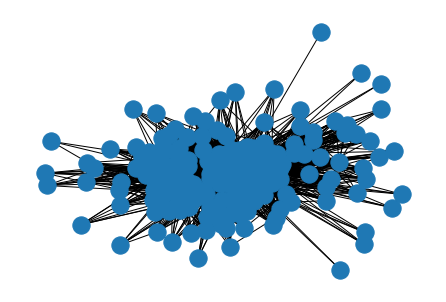

In [19]:
networkx.draw(G)

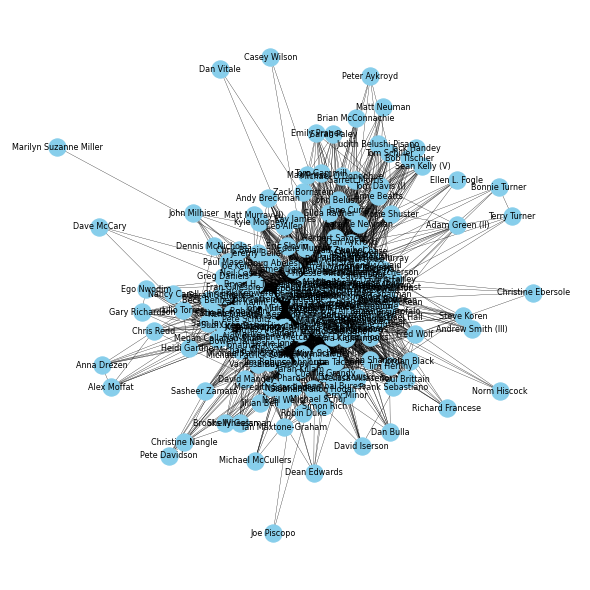

In [20]:
plt.figure(figsize=(8,8))
networkx.draw(G, with_labels=True, node_color='skyblue', width=.3, font_size=8)

In [21]:
networkx.degree(G)

DegreeView({'Adam Sandler': 126, 'Alan Zweibel': 120, 'Ben Stiller': 147, 'Bob Odenkirk': 134, 'Chris Rock': 132, "Conan O'Brien": 136, 'Gilda Radner': 49, 'Kevin Nealon': 105, 'Robert Downey Jr.': 96, 'Sarah Silverman': 149, 'Aidy Bryant': 87, 'Bobby Moynihan': 93, 'Kate McKinnon': 87, "Michael Patrick O'Brien": 69, "Michael Patrick O'Brien (II) ": 68, 'Pete Davidson': 7, 'Sasheer Zamata': 14, 'Vanessa Bayer': 64, 'Alex Moffat': 8, 'Anna Drezen': 8, 'Chris Redd': 13, 'Heidi Gardner': 26, 'Sam Jay': 48, 'Steve Higgins': 96, 'Sudi Green': 58, 'Andrew Smith (III)': 8, 'Dennis Miller': 98, 'Gilbert Gottfried': 114, 'Herbert Sargent': 34, 'Jan Hooks': 57, 'Laurie Metcalf': 66, 'Mike Myers': 113, 'Rob Schneider': 111, 'Bill Murray': 131, 'Dan Aykroyd': 125, 'Jane Curtin': 49, 'Molly Shannon': 128, 'Paul Shaffer': 119, 'Amy Poehler': 170, 'Billy Crystal': 108, 'Chevy Chase': 115, 'Chris Parnell': 114, 'Kristen Wiig': 145, 'Louis C.K.': 135, 'Tina Fey': 172, 'Tracy Morgan': 139, 'Alex Baze': 

In [22]:
# Who has the most number of connections in the network?
degrees = dict(networkx.degree(G))
networkx.set_node_attributes(G, name='degree', values=degrees)
degree_df = pd.DataFrame(G.nodes(data='degree'), columns=['node', 'degree'])
degree_df = degree_df.sort_values(by='degree', ascending=False)
degree_df


,node,degree
83,Lorne Michaels,210
51,Fred Armisen,173
44,Tina Fey,172
38,Amy Poehler,170
88,Bill Hader,166
...,...,...
198,Dave McCary,3
161,Joe Piscopo,2
207,Casey Wilson,2
208,Dan Vitale,2


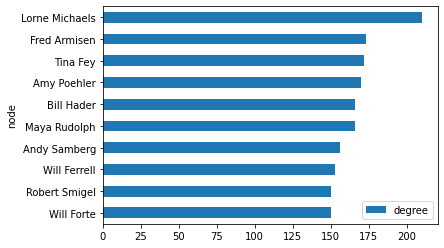

In [23]:
num_nodes_to_inspect = 10
degree_df[:num_nodes_to_inspect].plot(x='node', y='degree', kind='barh').invert_yaxis()

In [24]:
# Who has the most number of connections in the network (if you factor in edge weight)?
networkx.degree(G, weight='Weight')
weighted_degrees = dict(networkx.degree(G, weight='Weight'))
networkx.set_node_attributes(G, name='weighted_degree', values=weighted_degrees)
weighted_degree_df = pd.DataFrame(G.nodes(data='weighted_degree'), columns=['node', 'weighted_degree'])
weighted_degree_df = weighted_degree_df.sort_values(by='weighted_degree', ascending=False)
weighted_degree_df

,node,weighted_degree
83,Lorne Michaels,210
51,Fred Armisen,173
44,Tina Fey,172
38,Amy Poehler,170
88,Bill Hader,166
...,...,...
198,Dave McCary,3
161,Joe Piscopo,2
207,Casey Wilson,2
208,Dan Vitale,2


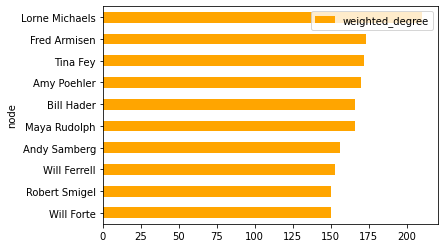

In [25]:
num_nodes_to_inspect = 10
weighted_degree_df[:num_nodes_to_inspect].plot(x='node', y='weighted_degree', color='orange', kind='barh').invert_yaxis()

In [26]:
#Who connects the most other nodes in the network?
networkx.betweenness_centrality(G)
betweenness_centrality = networkx.betweenness_centrality(G)
networkx.set_node_attributes(G, name='betweenness', values=betweenness_centrality)
betweenness_df = pd.DataFrame(G.nodes(data='betweenness'), columns=['node', 'betweenness'])
betweenness_df = betweenness_df.sort_values(by='betweenness', ascending=False)
betweenness_df

,node,betweenness
83,Lorne Michaels,0.133773
51,Fred Armisen,0.029167
91,Maya Rudolph,0.021124
44,Tina Fey,0.020902
88,Bill Hader,0.020167
...,...,...
198,Dave McCary,0.000000
199,Matt Murray (I),0.000000
143,Gary Richardson,0.000000
201,Peter Aykroyd,0.000000


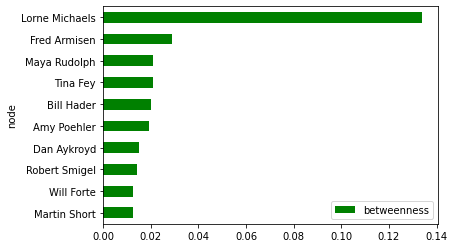

In [27]:
num_nodes_to_inspect = 10
betweenness_df[:num_nodes_to_inspect].plot(x='node', y='betweenness', color='green', kind='barh').invert_yaxis()

In [28]:
# Who forms distinct communities within this network?
from networkx.algorithms import community
communities = community.greedy_modularity_communities(G)
# Create empty dictionary
modularity_class = {}
#Loop through each community in the network
for community_number, community in enumerate(communities):
    #For each member of the community, add their community number
    for name in community:
        modularity_class[name] = community_number
networkx.set_node_attributes(G, modularity_class, 'modularity_class')
communities_df = pd.DataFrame(G.nodes(data='modularity_class'), columns=['node', 'modularity_class'])
communities_df = communities_df.sort_values(by='modularity_class', ascending=False)
communities_df.to_csv("communities_df.csv")

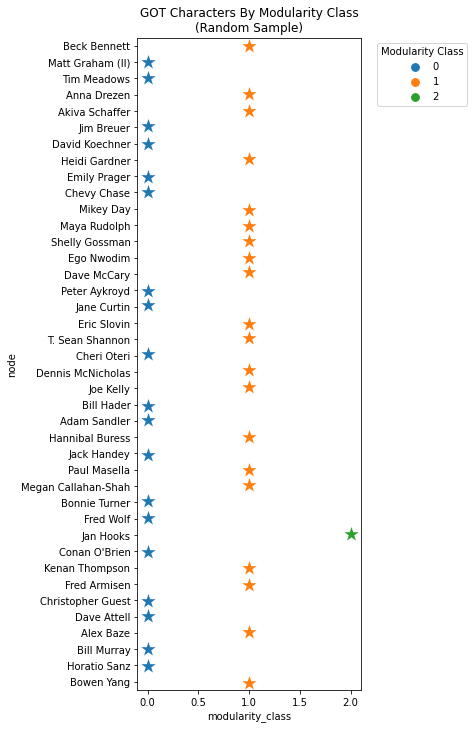

In [29]:
import seaborn as sns
#Set figure size
plt.figure(figsize=(4,12))

#Plot a categorical scatter plot from the dataframe communities_df.sample(40)
ax =sns.stripplot(x='modularity_class', y='node', data=communities_df.sample(40),
              hue='modularity_class', marker='*',size=15)
#Set legend outside the plot with bbox_to_anchor
ax.legend(loc='upper right',bbox_to_anchor=(1.5, 1), title='Modularity Class')
ax.set_title("GOT Characters By Modularity Class\n(Random Sample)")
plt.show()

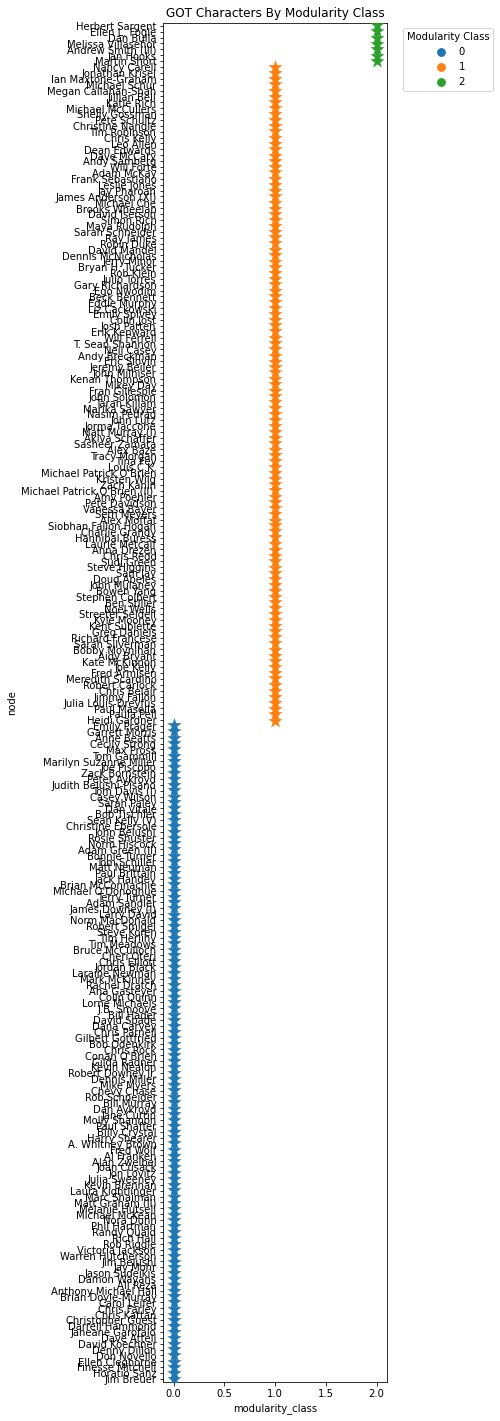

In [30]:
plt.figure(figsize=(4,25))

ax =sns.stripplot(x='modularity_class', y='node', data=communities_df,
              hue='modularity_class', marker='*',size=15)

ax.legend(loc='upper right',bbox_to_anchor=(1.5, 1), title='Modularity Class')
ax.set_title("GOT Characters By Modularity Class")
plt.show()

In [31]:
dict(G.nodes(data=True))
nodes_df = pd.DataFrame(dict(G.nodes(data=True))).T
nodes_df
nodes_df.sort_values(by='betweenness', ascending=False)

,degree,weighted_degree,betweenness,modularity_class
Lorne Michaels,210.0,210.0,0.133773,0.0
Fred Armisen,173.0,173.0,0.029167,1.0
Maya Rudolph,166.0,166.0,0.021124,1.0
Tina Fey,172.0,172.0,0.020902,1.0
Bill Hader,166.0,166.0,0.020167,0.0
...,...,...,...,...
Dave McCary,3.0,3.0,0.000000,1.0
Matt Murray (I),19.0,19.0,0.000000,1.0
Gary Richardson,11.0,11.0,0.000000,1.0
Peter Aykroyd,5.0,5.0,0.000000,0.0


In [33]:
# Build a Scatter Plot of Coefficients 
alums_coefficient = pd.read_csv("/Users/estene/Documents/GitHub/snl_coefficient/data/performers_with_coefficient.csv")
alums_coefficient.shape

(373, 19)

In [34]:
alums_coefficient.columns.values

array(['person', 'year_start', 'year_end', 'num_seasons_total',
       'num_seasons_writer', 'num_seasons_headwriter',
       'num_seasons_actor', 'num_seasons_rep', 'num_seasons_featured',
       'num_seasons_middle', 'num_seasons_weekend_update',
       'num_episodes_weekend_updates', 'best_of', 'num_episodes_hosted',
       'imdb_link', 'num_episodes_writer', 'num_episodes_actor',
       'num_episodes_other', 'coefficient'], dtype=object)

In [35]:
from bokeh.io import push_notebook, show, output_notebook
from bokeh.layouts import row 
from bokeh.plotting import figure

output_notebook()

Loading BokehJS ...

In [41]:
from bokeh.plotting import figure, output_file, save
p = figure(title = "SNL Alums Coefficients: Start Year x Coefficient",toolbar_location=None,
          tools="hover", tooltips="@person: @coefficient")
p.circle('year_start','coefficient',source=alums_coefficient,fill_alpha=0.2, size=10)
show(p)

output_file(filename="snl_alums_coefficient.html", title="SNL Alums Coefficient")

save(p)

In [43]:
# what is the average coefficient? what is the median coefficient?
import statistics
from statistics import mean
all_coeffs = alums_coefficient['coefficient'].to_list()
all_coeffs.remove(1)
median = statistics.median(all_coeffs)
avg = mean(all_coeffs)
print(median, avg)

0.0275755051152385 0.054498240612307694


In [44]:
big_coeffs = []
for co in all_coeffs:
    if co > avg:
        big_coeffs.append(co)
print(len(big_coeffs))

166


In [46]:
imp_persons = alums_coefficient[alums_coefficient['coefficient'].isin(big_coeffs)].reset_index()
lst_imp_persons = imp_persons['person'].to_list()
#lst_imp_persons

p = figure(title = "SNL Alums Coefficients: Start Year x Coefficient",toolbar_location=None,
          tools="hover", tooltips="@person: @coefficient")
p.circle('year_start','coefficient',source=imp_persons,fill_alpha=0.2, size=10)
show(p)

#output_file(filename="imp_snl_alums_coefficient.html", title="SNL Alums Coefficient")

#save(p)

NameError: name 'output_file' is not defined